In [2]:
#importing the data 

import pandas as pd
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [30]:
#checking column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
#customer id and payment method will not usefull for us thats why i am droping
data=df.drop(["customerID","PaymentMethod"],axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes


In [32]:
#checking for null values
x=data.isnull()
x.sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#checking is any punctuations
import string
string.punctuation
for i in string.punctuation:
    x=data.astype(str)==str(i)
    print(x.sum())

In [35]:
#getting dummies with labelencoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in data.columns:
    data[i]=le.fit_transform(data[i])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,991,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1340,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,137,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,795,2660,1


<Figure size 720x720 with 0 Axes>

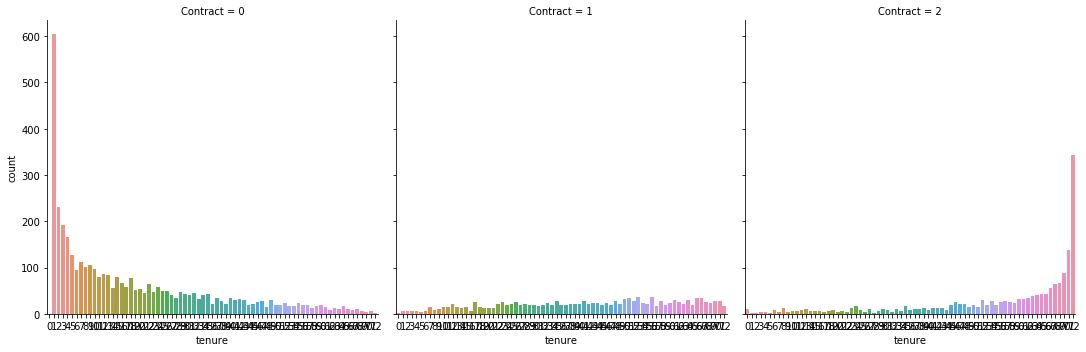

In [105]:
#analysing which customers are cant left[probably]
import seaborn as sns
plt.figure(figsize=(10,10))
sns.catplot("tenure",col="Contract",data=data,kind="count",aspect=1)
plt.show()

we can absorb from above graph that those who has less tenure and 
less contract they are high numbers and high tenure and high contract they are 
littile bit high so we can say that they are highly correlated 
and there is no chance to churn those who has correlated

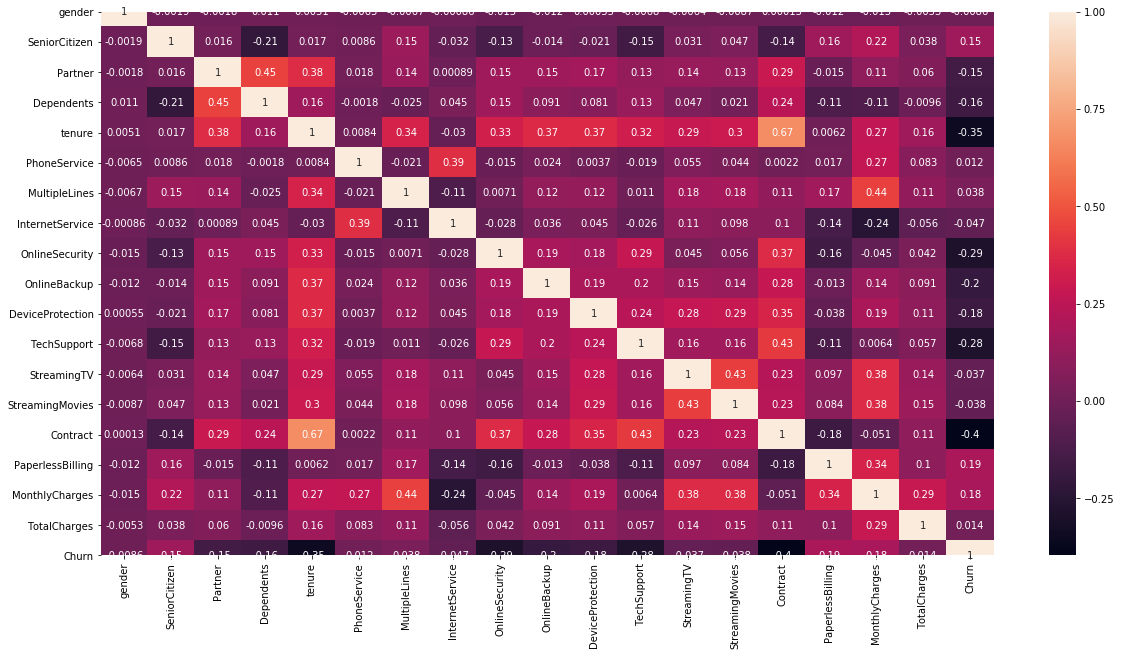

In [106]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [36]:
#divinding the target and input columns
x=data.drop(["Churn"],axis=1)
y=data["Churn"]

In [37]:
#splitting the data into train and test with 70% and 30%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
names=[]
logreg=LogisticRegression()
random=RandomForestClassifier(n_estimators=10)
naive=GaussianNB()
svm=SVC()
knn=KNeighborsClassifier()
decision= DecisionTreeClassifier()
names.append(logreg)
names.append(random)
names.append(naive)
names.append(svm)
names.append(knn)
names.append(decision)
names

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecat

In [73]:
import warnings
warnings.filterwarnings("ignore")

#performing cross_validation to check which algorithm is best to classify
algresults=[]

from sklearn.model_selection import cross_val_score
for model in names:
    
    n_res=cross_val_score(model,x_train,y_train,scoring="accuracy",cv=10)
    algresults.append(n_res)
    print(n_res.mean())

0.8004026583818901
0.7797092693582576
0.7553705465937562
0.7462423118885089
0.7472618619128681
0.735293903997995


In [ ]:
#from above cross_validation i got high accuracy at Logistic regression
# so i will go through that

In [74]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(x_train,y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8050165641268339

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[1413,  150],
       [ 262,  288]], dtype=int64)

In [78]:
from sklearn.metrics import classification_report
x=classification_report(y_test,y_predict)
print(x)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1563
           1       0.66      0.52      0.58       550

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



# conclusion:


    tenure [high or low] and contract [high or low] they wont churnn. 
    otherwise there may chance are may churn